In [53]:
#1. Realice un resumen estadístico de sus datos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Obtengo datos de la URL
datos_url = 'http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(datos_url)



In [32]:
#resumen estadistico
print(gapminder.describe())

             year           pop      lifeExp      gdpPercap
count  1704.00000  1.704000e+03  1704.000000    1704.000000
mean   1979.50000  2.960121e+07    59.474439    7215.327081
std      17.26533  1.061579e+08    12.917107    9857.454543
min    1952.00000  6.001100e+04    23.599000     241.165876
25%    1965.75000  2.793664e+06    48.198000    1202.060309
50%    1979.50000  7.023596e+06    60.712500    3531.846988
75%    1993.25000  1.958522e+07    70.845500    9325.462346
max    2007.00000  1.318683e+09    82.603000  113523.132900


In [34]:
#2. Agrupe por la variable “año”. Comente respecto al resultado al usar groupby.

#Verificar si hay valores no numéricos en el DataFrame
non_numeric_values = gapminder.apply(lambda x: pd.to_numeric(x, errors='coerce').isna().sum())
print(non_numeric_values)

country      1704
year            0
pop             0
continent    1704
lifeExp         0
gdpPercap       0
dtype: int64


In [35]:
#Operacion de agregacion
gapminder.groupby('year').describe()
#Realizo agregacion
grouped = gapminder.groupby('year').describe() 
#Imprimo resultado
print(grouped)


        pop                                                                 
      count          mean           std       min         25%         50%   
year                                                                        
1952  142.0  1.695040e+07  5.810086e+07   60011.0  1452026.25   3943953.0  \
1957  142.0  1.876341e+07  6.550429e+07   61325.0  1568811.25   4282942.0   
1962  142.0  2.042101e+07  6.978865e+07   65345.0  1784362.00   4686039.5   
1967  142.0  2.265830e+07  7.837548e+07   70787.0  2034768.50   5170175.5   
1972  142.0  2.518998e+07  8.864682e+07   76595.0  2351191.50   5877996.5   
1977  142.0  2.767638e+07  9.748109e+07   86796.0  2759717.25   6404036.5   
1982  142.0  3.020730e+07  1.050986e+08   98593.0  3006286.25   7007320.0   
1987  142.0  3.303857e+07  1.147562e+08  110812.0  3194989.50   7774861.5   
1992  142.0  3.599092e+07  1.245026e+08  125911.0  3605992.00   8688686.5   
1997  142.0  3.883947e+07  1.334174e+08  145608.0  3770149.75   9735063.5   

In [41]:
#3. Ahora obtenga la suma (la cantidad), la media y la mediana para cada grupo, es decir, por año.

# Agrupo por año para realizar agregacion
grouped_gapminder = gapminder.groupby('year').agg({'pop': ['sum', 'mean', 'median'],'continent': 'first', 'lifeExp': ['mean', 'median'], 'gdpPercap': ['mean', 'median']})

# Imprimo resultado
print(grouped_gapminder)


               pop                           continent    lifeExp            
               sum          mean      median     first       mean   median   
year                                                                         
1952  2.406957e+09  1.695040e+07   3943953.0      Asia  49.057620  45.1355  \
1957  2.664405e+09  1.876341e+07   4282942.0      Asia  51.507401  48.3605   
1962  2.899783e+09  2.042101e+07   4686039.5      Asia  53.609249  50.8810   
1967  3.217478e+09  2.265830e+07   5170175.5      Asia  55.678290  53.8250   
1972  3.576977e+09  2.518998e+07   5877996.5      Asia  57.647386  56.5300   
1977  3.930046e+09  2.767638e+07   6404036.5      Asia  59.570157  59.6720   
1982  4.289437e+09  3.020730e+07   7007320.0      Asia  61.533197  62.4415   
1987  4.691477e+09  3.303857e+07   7774861.5      Asia  63.212613  65.8340   
1992  5.110710e+09  3.599092e+07   8688686.5      Asia  64.160338  67.7030   
1997  5.515204e+09  3.883947e+07   9735063.5      Asia  65.01467

In [46]:
#4. ¿Sabías que en 1967 en Chile se inaugura el Aeropuerto Internacional Arturo Merino Benítez? Usando estos datos se puede especificar 
#un año y obtener un marco de datos más pequeño para el año usando la función get_group(). Por ejemplo, podemos obtener el marco de datos
#agrupados para el año 1967. Comenta tus resultados. Escoge otro año explicando el porqué de la elección y qué resultados obtuviste.


#Respuesta
#Escoge otro año explicando el porqué de la elección y qué resultados obtuviste.
#elijo un año que se encontraba dentro de los años en el dataframe y los resultados los muestro con el siguiente script

gapminder_1997 = gapminder.groupby('year').get_group(1997)
print(gapminder_1997.describe())


         year           pop     lifeExp     gdpPercap
count   142.0  1.420000e+02  142.000000    142.000000
mean   1997.0  3.883947e+07   65.014676   9090.175363
std       0.0  1.334174e+08   11.559439  10171.493263
min    1997.0  1.456080e+05   36.087000    312.188423
25%    1997.0  3.770150e+06   55.633750   1366.837958
50%    1997.0  9.735064e+06   69.394000   4781.825478
75%    1997.0  2.431137e+07   74.169750  12022.867188
max    1997.0  1.230075e+09   80.690000  41283.164330


In [ ]:
#Ahora con los datos anteriores construya tablas pivote según las siguientes instrucciones:

In [49]:
#1. Construya una tabla fijando “continent”, con las funciones vistas en clase
pivot_continent = pd.pivot_table(gapminder, values='pop', index='year', columns='continent', aggfunc=np.sum)
print(pivot_continent)


continent       Africa     Americas          Asia       Europe     Oceania
year                                                                      
1952       237640501.0  345152446.0  1.395357e+09  418120846.0  10686006.0
1957       264837738.0  386953916.0  1.562781e+09  437890351.0  11941976.0
1962       296516865.0  433270254.0  1.696357e+09  460355155.0  13283518.0
1967       335289489.0  480746623.0  1.905663e+09  481178958.0  14600414.0
1972       379879541.0  529384210.0  2.150972e+09  500635059.0  16106100.0
1977       433061021.0  578067699.0  2.384514e+09  517164531.0  17239000.0
1982       499348587.0  630290920.0  2.610136e+09  531266901.0  18394850.0
1987       574834110.0  682753971.0  2.871221e+09  543094160.0  19574415.0
1992       659081517.0  739274104.0  3.133292e+09  558142797.0  20919651.0
1997       743832984.0  796900410.0  3.383286e+09  568944148.0  22241430.0
2002       833723916.0  849772762.0  3.601802e+09  578223869.0  23454829.0
2007       929539692.0  8

In [56]:
#2. Realice una tabla de doble entrada, fijando “continent” y “year”. Comente sus resultados.
pivot_continent_year = pd.pivot_table(gapminder, values='pop', index='continent', columns='year', aggfunc=np.sum)
print(pivot_continent_year)


year               1952          1957          1962          1967   
continent                                                           
Africa     2.376405e+08  2.648377e+08  2.965169e+08  3.352895e+08  \
Americas   3.451524e+08  3.869539e+08  4.332703e+08  4.807466e+08   
Asia       1.395357e+09  1.562781e+09  1.696357e+09  1.905663e+09   
Europe     4.181208e+08  4.378904e+08  4.603552e+08  4.811790e+08   
Oceania    1.068601e+07  1.194198e+07  1.328352e+07  1.460041e+07   

year               1972          1977          1982          1987   
continent                                                           
Africa     3.798795e+08  4.330610e+08  4.993486e+08  5.748341e+08  \
Americas   5.293842e+08  5.780677e+08  6.302909e+08  6.827540e+08   
Asia       2.150972e+09  2.384514e+09  2.610136e+09  2.871221e+09   
Europe     5.006351e+08  5.171645e+08  5.312669e+08  5.430942e+08   
Oceania    1.610610e+07  1.723900e+07  1.839485e+07  1.957442e+07   

year               1992         

In [51]:
#3. Con las variables anteriores, obtenga el promedio de la variable “pop”.
pop_mean = gapminder.groupby('year')['pop'].mean()
print(pop_mean)


year
1952    1.695040e+07
1957    1.876341e+07
1962    2.042101e+07
1967    2.265830e+07
1972    2.518998e+07
1977    2.767638e+07
1982    3.020730e+07
1987    3.303857e+07
1992    3.599092e+07
1997    3.883947e+07
2002    4.145759e+07
2007    4.402122e+07
Name: pop, dtype: float64


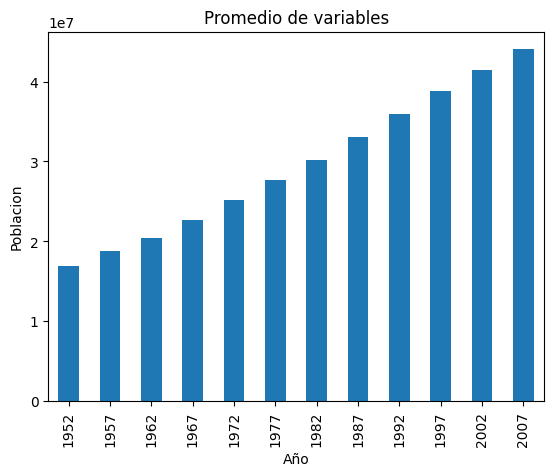

In [57]:
#4. Obtenga un gráfico de barras del punto 3, comente sus resultados.
pop_mean.plot(kind='bar')
plt.title('Promedio de variables')
plt.xlabel('Año')
plt.ylabel('Poblacion')
plt.show()
